Reference code: https://github.com/cortex-lab/spikes/blob/8dc617c6dd5b279341506b7411004772ba05f4cc/visualization/plotDriftmap.m

In [2]:
import brainbox as bb
import datajoint as dj
from ibl_pipeline import behavior
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from ibl_pipeline.plotting import plotting_utils_ephys as putils
# from ibl_pipeline.plotting import ephys as ephys_plotting
import pandas as pd
import colorlover as cl
import json
import seaborn as sns
import pdb

Connecting shan@datajoint.internationalbrainlab.org:3306
Connected to https://alyx.internationalbrainlab.org as vathes


In [3]:
ephys = dj.create_virtual_module('ephys', 'test_ibl_ephys')

In [34]:
from uuid import UUID
import datetime
key = {'subject_uuid': UUID('15f98ab5-20d8-4345-a5de-21912a39575f'),
   'session_start_time': datetime.datetime(2020, 1, 22, 8, 28, 49),
   'probe_idx': 1,}
#    'cluster_id': 35}
from tqdm import tqdm

In [35]:
clusters_keys = (ephys.DefaultCluster & key).fetch('KEY')

In [42]:
color_bins = sns.color_palette("hls", 100)

In [113]:
new_color_bins = np.vstack(np.transpose(np.reshape(color_bins, [4, 25, 3]), [1,0,2]))

In [114]:
new_color_bins

array([[0.86  , 0.3712, 0.34  ],
       [0.5688, 0.86  , 0.34  ],
       [0.34  , 0.8288, 0.86  ],
       [0.6312, 0.34  , 0.86  ],
       [0.86  , 0.4024, 0.34  ],
       [0.5376, 0.86  , 0.34  ],
       [0.34  , 0.7976, 0.86  ],
       [0.6624, 0.34  , 0.86  ],
       [0.86  , 0.4336, 0.34  ],
       [0.5064, 0.86  , 0.34  ],
       [0.34  , 0.7664, 0.86  ],
       [0.6936, 0.34  , 0.86  ],
       [0.86  , 0.4648, 0.34  ],
       [0.4752, 0.86  , 0.34  ],
       [0.34  , 0.7352, 0.86  ],
       [0.7248, 0.34  , 0.86  ],
       [0.86  , 0.496 , 0.34  ],
       [0.444 , 0.86  , 0.34  ],
       [0.34  , 0.704 , 0.86  ],
       [0.756 , 0.34  , 0.86  ],
       [0.86  , 0.5272, 0.34  ],
       [0.4128, 0.86  , 0.34  ],
       [0.34  , 0.6728, 0.86  ],
       [0.7872, 0.34  , 0.86  ],
       [0.86  , 0.5584, 0.34  ],
       [0.3816, 0.86  , 0.34  ],
       [0.34  , 0.6416, 0.86  ],
       [0.8184, 0.34  , 0.86  ],
       [0.86  , 0.5896, 0.34  ],
       [0.3504, 0.86  , 0.34  ],
       [0.

In [115]:
x = np.array([1, 2, 3, 4, 5, 6])

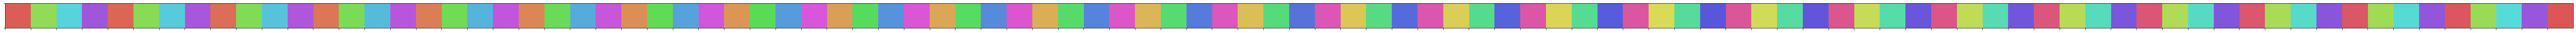

In [116]:
sns.palplot(new_color_bins)

In [65]:
y = np.reshape(x, [2, 3])
y

array([[1, 2, 3],
       [4, 5, 6]])

In [74]:
z = (np.vstack(y)).T
np.hstack(z)

array([1, 4, 2, 5, 3, 6])

In [33]:
cluster_ids = []
clusters_spk_times = []
clusters_spk_amps = []
for cluster_key in tqdm(clusters_keys):
    cluster = ephys.DefaultCluster & cluster_key
    cluster_id, spk_times, spk_depths, spk_amps = clusters.fetch1(
        'cluster_id', 'cluster_spikes_times', 'cluster_spikes_depths', 'cluster_spikes_amps')
    

NameError: name 'tqdm' is not defined

In [25]:
clusters_ids, spk_times, spk_depths, spk_amps = clusters.fetch(
    'cluster_id', 'cluster_spikes_times', 'cluster_spikes_depths', 'cluster_spikes_amps')

KeyboardInterrupt: 

In [23]:
# merge the arrays into one vec
cluster_spk_times = np.hstack(spk_times)
cluster_spk_depths = np.hstack(spk_depths)
cluster_spk_amps = np.hstack(spk_amps)
cluster_ids = [[cluster_id] * len(spk_time) for cluster_id, spk_time in zip(cluster_ids, spk_times)]

TypeError: zip argument #1 must support iteration

cluster_ids

In [24]:
cluster_ids

35